In [14]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import plotly.express as px
import seaborn as sns  # Import Seaborn for enhanced plotting capabilities
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling
from scipy.cluster.hierarchy import linkage

In [16]:
df = pd.read_csv('Credit_card_dataset.csv')

In [17]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [19]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [20]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
PAYMENTS,8950.0,NaN,NaN,NaN,1733.143852,2895.063757,0.0,383.276166,856.901546,1901.134317,50721.48336
CREDIT_LIMIT,8949.0,NaN,NaN,NaN,4494.44945,3638.815725,50.0,1600.0,3000.0,6500.0,30000.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176


In [21]:
df['CUST_ID'].value_counts()

CUST_ID
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: count, Length: 8950, dtype: int64

In [22]:
X = df[['PURCHASES', 'CASH_ADVANCE']]

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

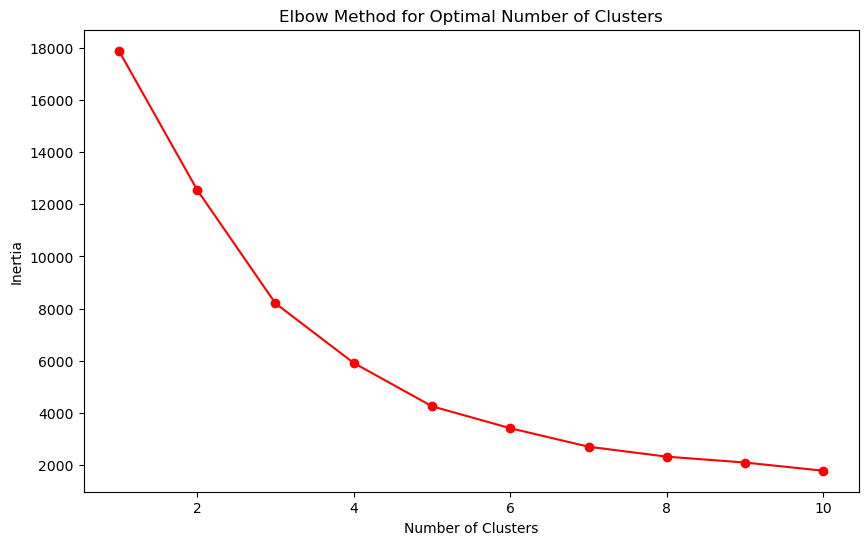

In [24]:
inertia = [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(X_scaled) 
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, 'ro-') 


plt.title('Elbow Method for Optimal Number of Clusters')  
plt.xlabel('Number of Clusters')  
plt.ylabel('Inertia') 
plt.show() 

In [25]:
kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(X_scaled)  

KMeans(n_clusters=5, random_state=42)

In [26]:
linked = linkage(X_scaled, method='ward')

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

In [31]:
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.5, random_state=42)

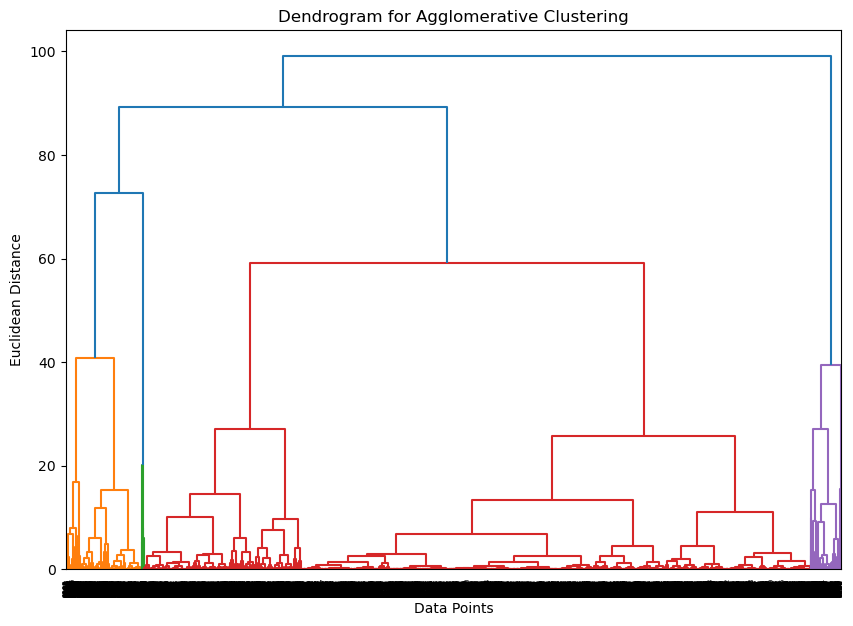

In [32]:
plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add a title to the plot to describe it as a dendrogram for agglomerative clustering
plt.title('Dendrogram for Agglomerative Clustering')

# Label the x-axis as 'Data Points' since the horizontal axis represents the individual data points or clusters
plt.xlabel('Data Points')

# Label the y-axis as 'Euclidean Distance' because the vertical axis represents the distance between merged clusters
plt.ylabel('Euclidean Distance')

# Display the plot
plt.show()